In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction to Matplotlib

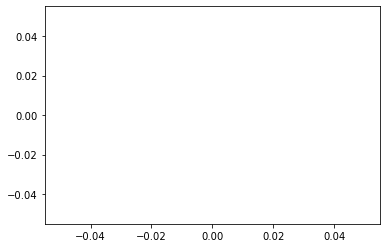

In [2]:
# Create a plot/figure
plt.plot(); # use ; to get rid of blank [] Jupyter Notebook output

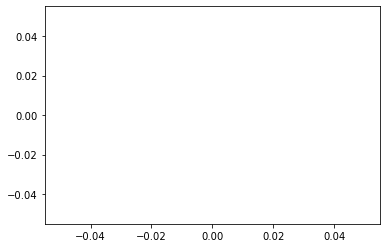

In [3]:
# Another way to get rid of blank [] output
plt.plot()
plt.show() 

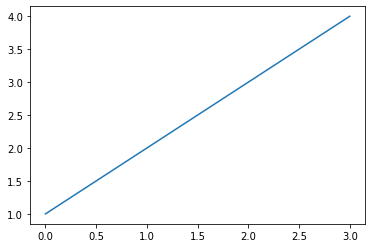

In [4]:
plt.plot([1, 2 ,3, 4]);

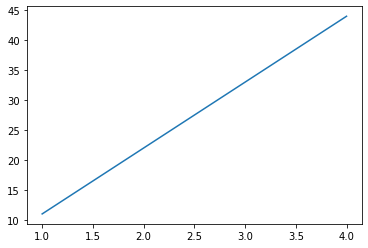

In [5]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y);

## Multiple Ways to Create Figures

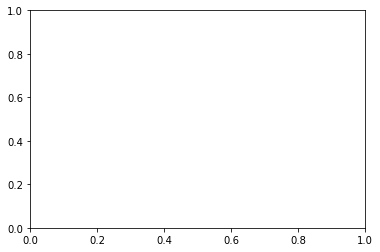

In [6]:
# 1st method
fig = plt.figure() # create a figure
ax = fig.add_subplot() # adds some axes
plt.show()

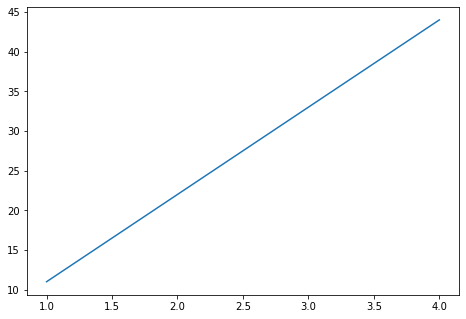

In [7]:
# 2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

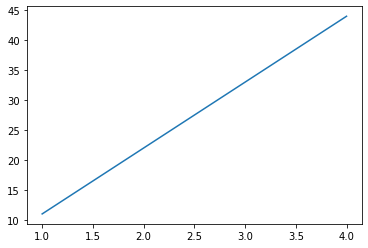

In [8]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,y);

## Anatomy of a Matplotlib Figure
The matplotlib docs recommend using the object-oriented interfaces. Here's a guide with code examples showing how to create all the different pieces:

![](../images/anatomy-of-matplotlib-figure.png)

## Matplotlib example workflow

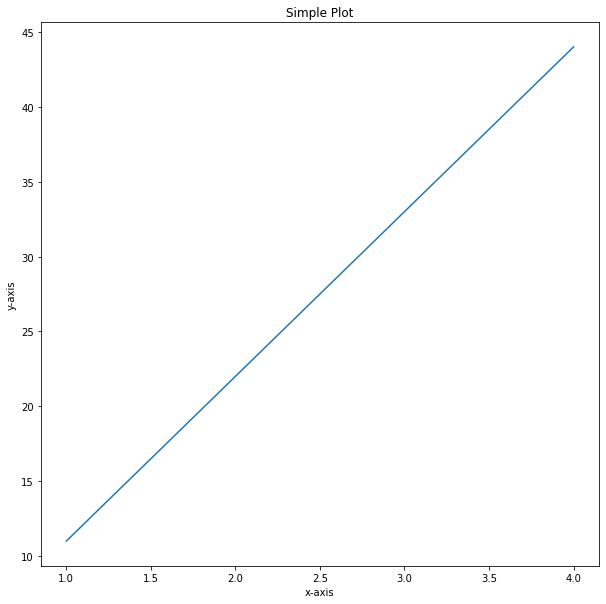

In [9]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # figsize=(width, height)

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show (you save the figure)
fig.savefig("../images/sample-plot.png")

## Making Figures with NumPy ndarrays
Making:
- Line Plot (default)
- Scatter Plot
- Bar Plot
- Histogram
- Subplots

In [10]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

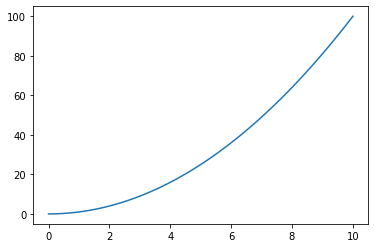

In [11]:
# Plot the data (default line plot)
fig, ax = plt.subplots()
ax.plot(x, x**2);

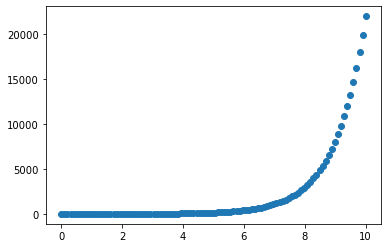

In [12]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

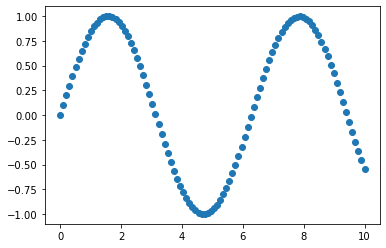

In [13]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

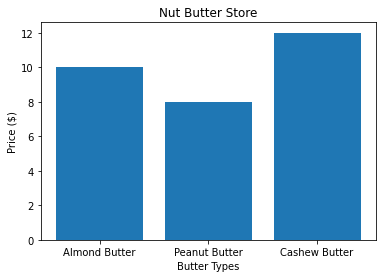

In [14]:
# Make a bar plot from a dictionary
nut_butter_prices = {"Almond Butter": 10, "Peanut Butter": 8, "Cashew Butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) # bar(x, y)
ax.set(title="Nut Butter Store", xlabel="Butter Types", ylabel="Price ($)");

<BarContainer object of 3 artists>

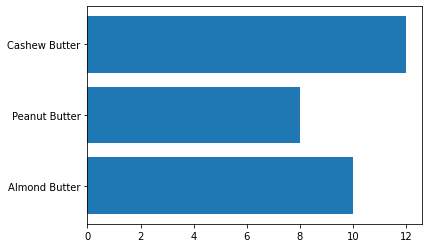

In [15]:
# Horizontal bar chart with barh()
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

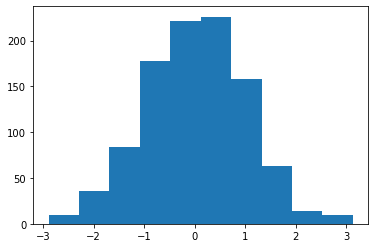

In [16]:
# Make some data for histograms
x = np.random.randn(1000) # randn gives values from a normal distribution
fig, ax = plt.subplots()
ax.hist(x); # histogram with hist()

### Two Options for Subplots

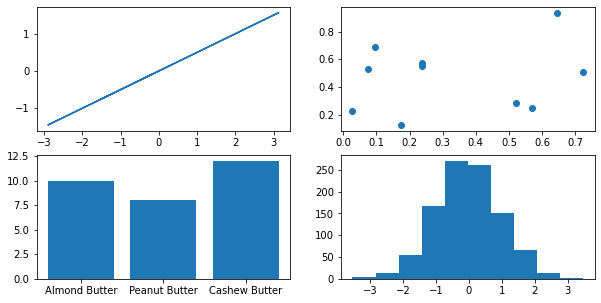

In [17]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

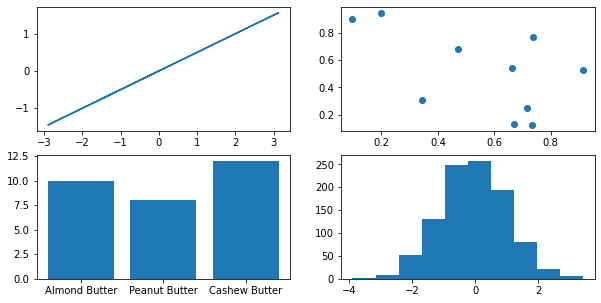

In [18]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot to each different index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from Pandas DataFrames

In [23]:
# Make a DataFrame
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<AxesSubplot:>

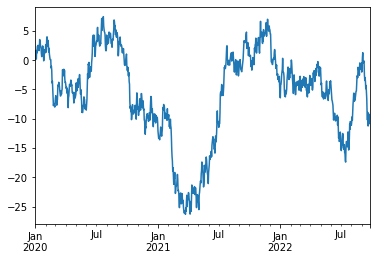

In [21]:
# Plotting from a Pandas Series
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()
ts.plot()

In [24]:
# Plot from Pandas DataFrame
# Must convert string data to int data
car_sales["Price"] = car_sales.Price.str.replace('[\$\,]|\.\d*', '', regex=True).astype(int)
car_sales.Price

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: int32

In [25]:
# To give a date range for X axis, create new column with ranges
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [26]:
# Create a Total Sales column that aggregates money made over time with each sale
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


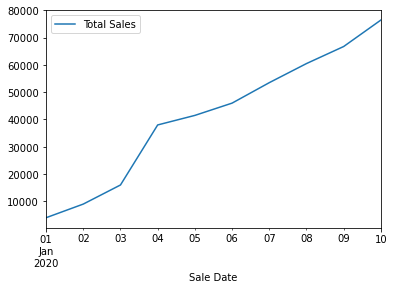

In [27]:
# Plot Total Sales over time
car_sales.plot(x="Sale Date", y="Total Sales");

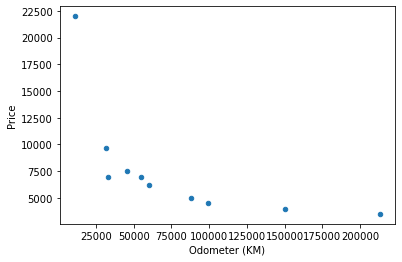

In [30]:
# Plot DataFrame as scatter plot with kind="scatter"
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [32]:
# Bar Graph practice
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.947091,0.557064,0.938928,0.718951
1,0.720417,0.066936,0.023312,0.876679
2,0.940609,0.453368,0.423300,0.530758
3,0.732920,0.376748,0.349583,0.643084
4,0.256882,0.573673,0.632710,0.926460
5,0.259419,0.551787,0.504453,0.149785
6,0.360710,0.463715,0.828791,0.611544
7,0.216269,0.608023,0.582449,0.498389
8,0.196321,0.934607,0.233778,0.062954
9,0.168579,0.592354,0.377030,0.610921


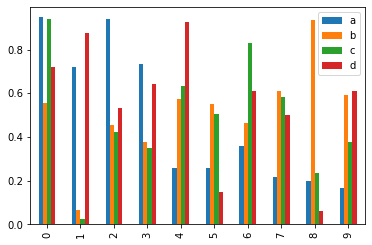

In [33]:
df.plot.bar();

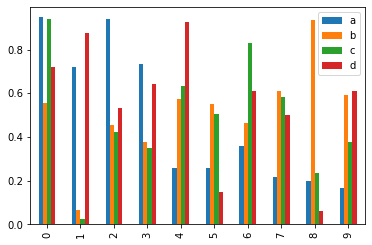

In [34]:
df.plot(kind="bar");

In [35]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


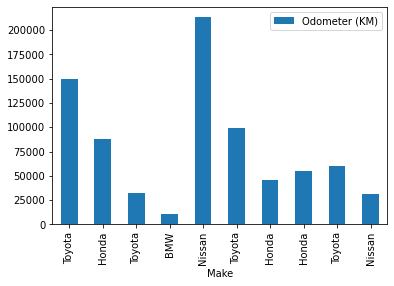

In [36]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

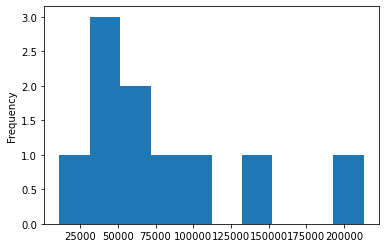

In [37]:
# Histogram practice
car_sales["Odometer (KM)"].plot.hist();

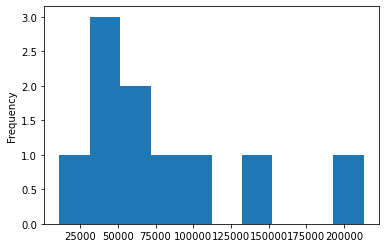

In [38]:
car_sales["Odometer (KM)"].plot(kind="hist");

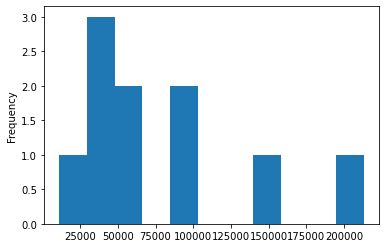

In [45]:
# Adjust number of histogram bins with .plot.hist() (default is 10)
car_sales["Odometer (KM)"].plot.hist(bins=11);

## Trying Again with Another Data Set

In [46]:
# Import and check
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:ylabel='Frequency'>

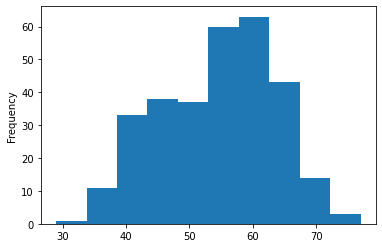

In [59]:
# Create histogram of age
heart_disease["age"].plot.hist(bins=10)

In [60]:
# Subplots
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### pyplot vs matplotlib object-oriented

Plotting an entire DataFrame with pyplot and `subplots=True` (looks like `dataframe.plot(subplots=True)`) will plot each column into its own subplot all within the same figure. You can do some customizing of the entire figure with `figsize`, but the options are rather limited.

If you are doing more complicated plotting, the matplotlib object-oriented API methods are better because each subplot can be individually targeted and adjusted.

- Use pyplot when doing quick plots, using simple data, or just trying to see a basic visualization
- Use matplotlib OO when plotting more advanced data and making cleaner presentations

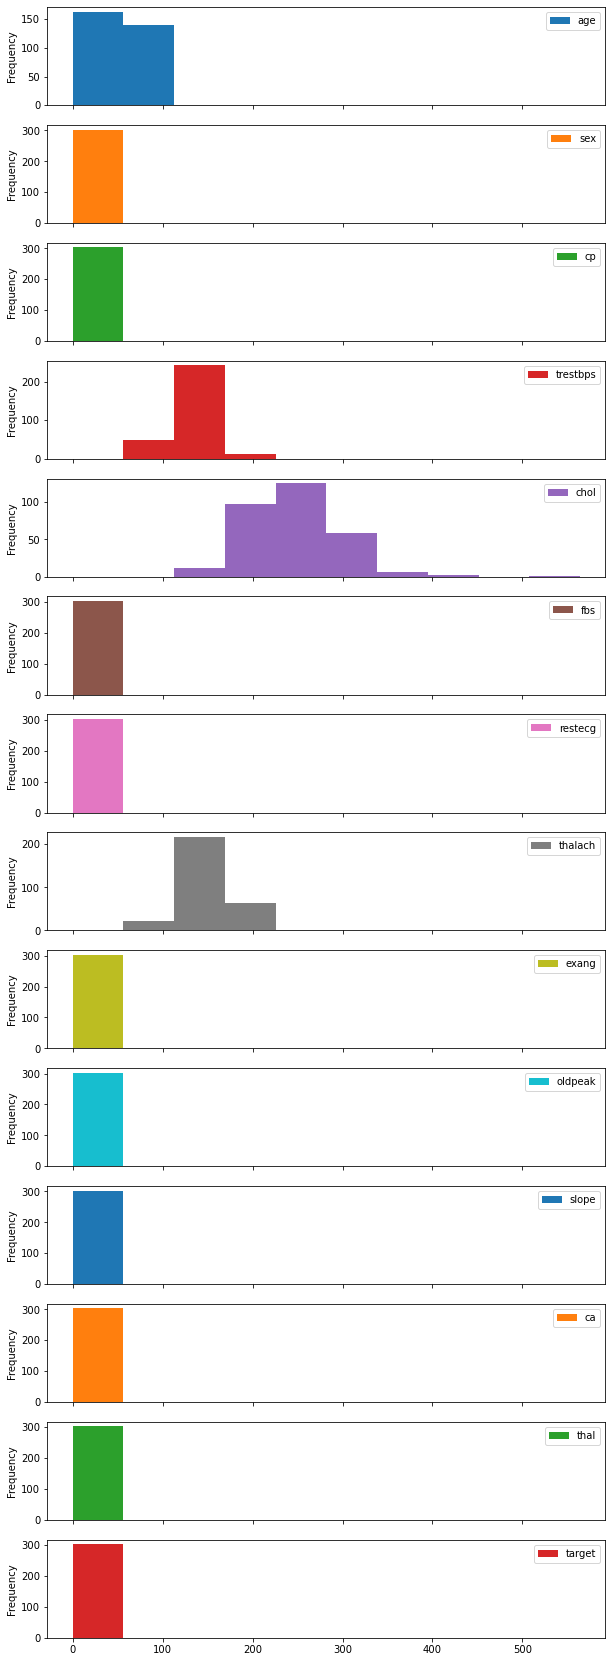

In [63]:
# Pyplot stateless plotting with limited customization
heart_disease.plot.hist(figsize=(10,30), subplots=True);

In [64]:
# matplotlib Object Oriented plotting with individually customizable subplots
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
# Look at people over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


<AxesSubplot:xlabel='age', ylabel='chol'>

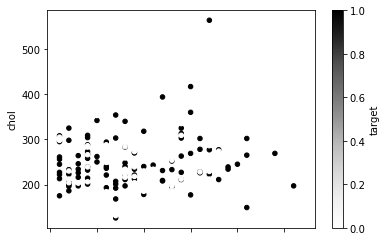

In [68]:
# Pyplot method that doesn't really accomplish what we want
over_50.plot(kind="scatter", x="age", y="chol", c="target")

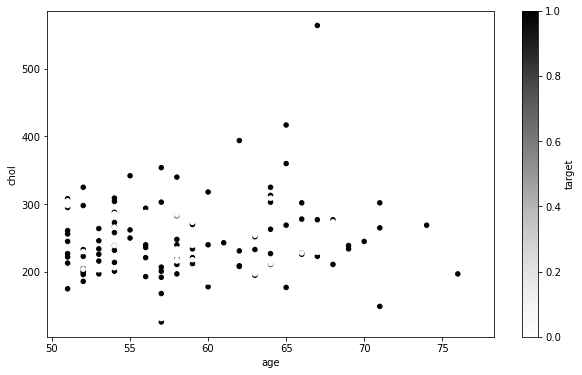

In [72]:
# matplotlib OO method mixed with Pyplot
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind="scatter", x="age", y="chol", c="target", ax=ax); # doing over_50.plot is the Pyplot way, but setting ax=ax gets into OO a little
# ax.set_xlim([45, 100]); # adjust custom x axis limits 

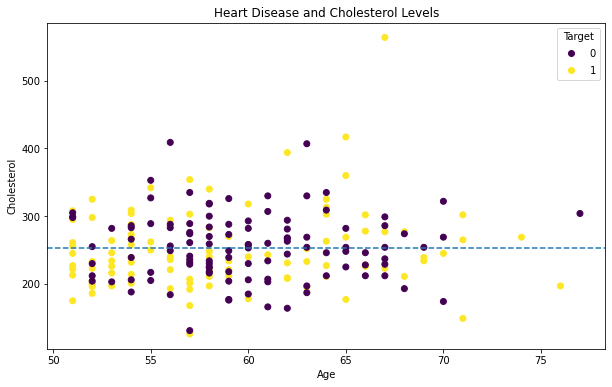

In [79]:
# matplotlib OO from scratch entirely
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age", ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line for average values
ax.axhline(over_50["chol"].mean(), linestyle="--")

In [80]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


### Subplots of chol, age, thalach

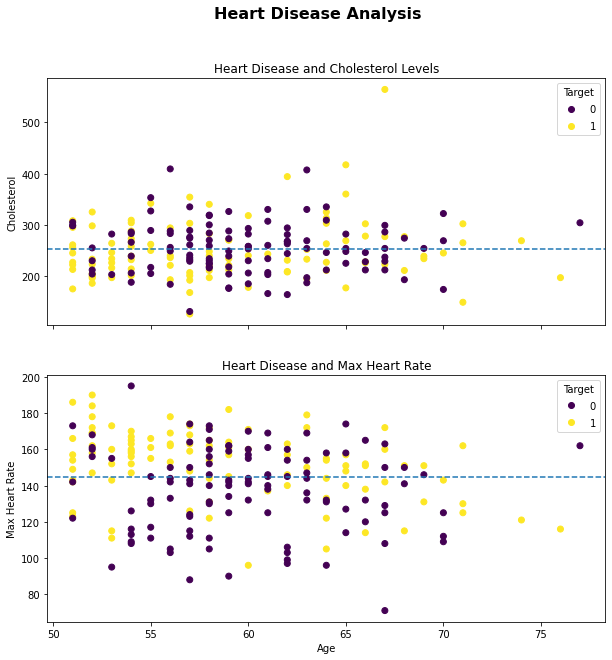

In [94]:
# Create figure with subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True) # Share X makes the subplots share an x axis

# ax0 Customization
## Add ax0 data
scatter0 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])

## Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels", ylabel="Cholesterol")

## Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

## Add a meanline to ax0
ax0.axhline(y=over_50["chol"].mean(), linestyle="--")

# ax1 Customization
## Add ax1 data
scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"])

## Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate", xlabel="Age", ylabel="Max Heart Rate")

## Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

## Add a meanline to ax1
ax1.axhline(y=over_50["thalach"].mean(), linestyle="--")

# Make a title for the entire figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


## Customizing Your Plots

### Using Preset Styles

In [95]:
# See the different available styles 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

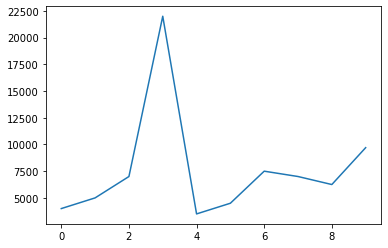

In [96]:
# Default style
car_sales["Price"].plot();

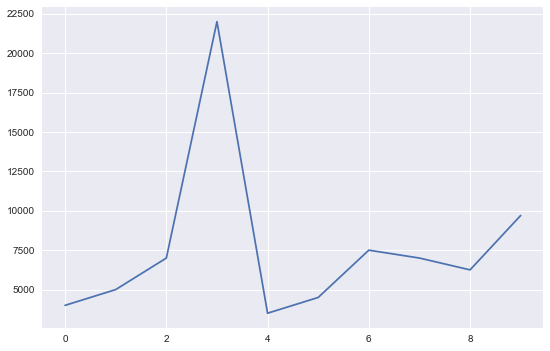

In [101]:
# Change style
plt.style.use('seaborn')
car_sales["Price"].plot();

In [103]:
# Create some data
x = np.random.randn(10,4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,2.699609,-0.379734,-0.193564,1.828060
1,-0.009017,1.404689,1.087980,0.747577
2,1.528425,-0.463548,0.598862,0.004699
3,-0.901130,0.353533,-0.312751,0.913898
4,0.678085,-0.577446,-0.997973,-0.803858
5,0.401395,1.796942,1.313854,-1.453256
6,-0.242386,-0.196919,2.628113,-1.398799
7,-0.646047,0.300609,1.319184,0.821784
8,0.645094,0.445539,0.469385,-0.186914
9,0.393405,0.243974,-0.266584,-1.138714


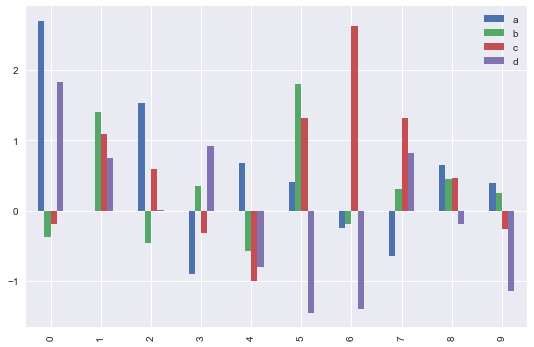

In [104]:
ax = df.plot(kind='bar')

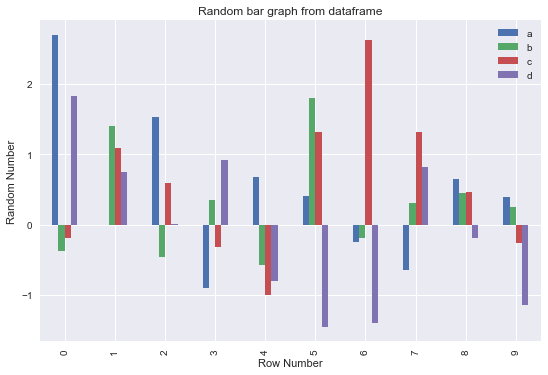

In [106]:
# Customize with set() method
ax=df.plot(kind='bar')

# Add some labels and a title
ax.set(title="Random bar graph from dataframe", xlabel="Row Number", ylabel="Random Number")

# Make legend visible
ax.legend().set_visible(True)

### Customizing Preset Styles

**Color Presets**:
This will be demonstrated with the `cmap` attribute when configuring an axis. There is [cmap documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html) with a lot of exmaples of different codes/names you can use for default color themes

**Axis Limits**:
You can do this with `ax.set_xlim([low, hi])` and `ax.set_ylim([low, hi])`

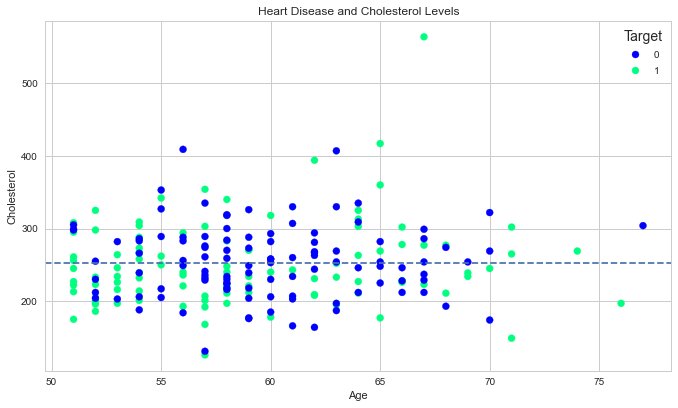

In [118]:
# Set preset style
plt.style.use('seaborn-whitegrid')

# matplotlib OO from scratch entirely
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"],
                    cmap="winter") # cmap changes the color theme

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age", ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line for average values
ax.axhline(over_50["chol"].mean(), linestyle="--");

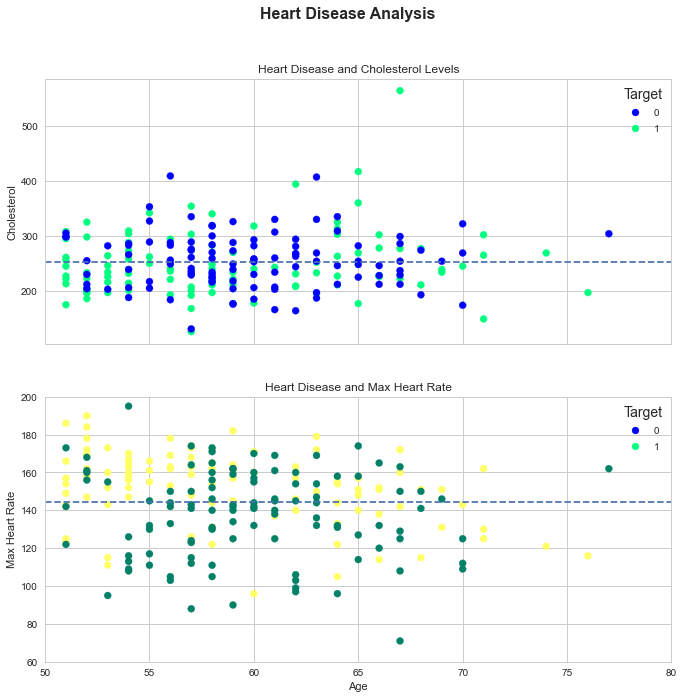

In [123]:
# Create figure with subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True) # Share X makes the subplots share an x axis

# ax0 Customization
## Add ax0 data
scatter0 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"],
                        cmap="winter")

## Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels", ylabel="Cholesterol")

# Change ax0 axis limits
ax0.set_xlim([50,80])

## Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

## Add a meanline to ax0
ax0.axhline(y=over_50["chol"].mean(), linestyle="--")

# ax1 Customization
## Add ax1 data
scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"],
                        cmap="summer")

## Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate", xlabel="Age", ylabel="Max Heart Rate")

# Change ax1 axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

## Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

## Add a meanline to ax1
ax1.axhline(y=over_50["thalach"].mean(), linestyle="--")

# Make a title for the entire figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Saving and Sharing Plots
You can run the code to get the image output and then just right click and Save As, but you can also export with code...

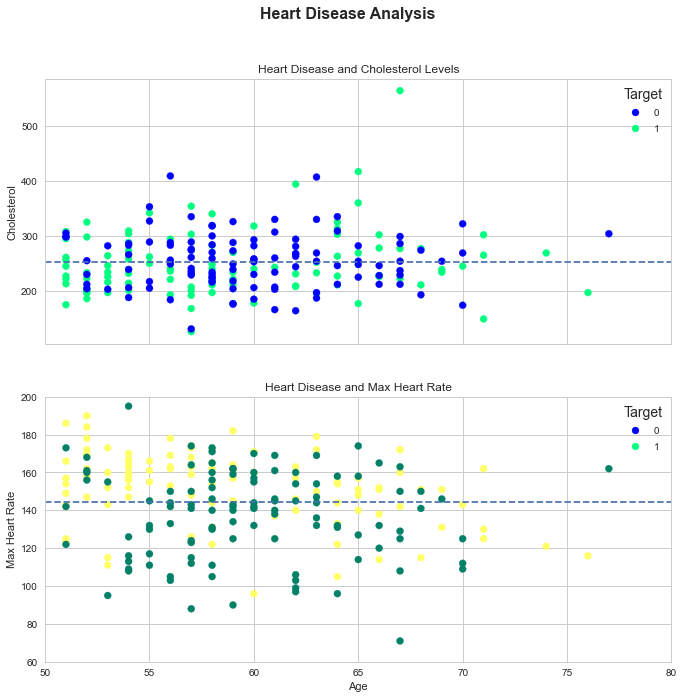

In [124]:
# See the figure that is stored by Jupyter Notebooks as this point
fig

In [125]:
# Save the figure to specified filepath
fig.savefig("../images/heart-disease-code-plot.png")